# __Los Datos Análisis sobre Top Aplicaciones de Google Play Store__
#### Hecho por [Johann Pineda](https://github.com/theonejohann)
---

## 1. Importador & Información
---

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-apps-in-google-play/Top-Apps-in-Google-Play.csv


In [2]:
# Leer el CSV File
df = pd.read_csv("../input/top-apps-in-google-play/Top-Apps-in-Google-Play.csv")

# Leer Basico Información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         70 non-null     int64 
 1   App Name           70 non-null     object
 2   App Id             70 non-null     object
 3   Category           70 non-null     object
 4   Developer Id       70 non-null     object
 5   Developer Website  70 non-null     object
 6   Developer Email    70 non-null     object
 7   Content Rating     70 non-null     object
 8   Ad Supported       70 non-null     bool  
 9   In App Purchases   70 non-null     bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 4.6+ KB


In [3]:
# Cheque cima 5 filas
df.head()

,Unnamed: 0,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases
0,1,Google Play services,com.google.android.gms,Tools,Google LLC,https://developers.google.com/android/google-p...,apps-help@google.com,Everyone,False,False
1,2,YouTube,com.google.android.youtube,Video Players & Editors,Google LLC,https://support.google.com/youtube/topic/24225...,ytandroid-support@google.com,Teen,True,False
2,3,Google,com.google.android.googlequicksearchbox,Tools,Google LLC,https://www.google.com/search/about/,apps-help@google.com,Everyone,True,False
3,4,Google Maps - Navigate & Explore,com.google.android.apps.maps,Travel & Local,Google LLC,http://maps.google.com/about/,apps-help@google.com,Everyone,True,False
4,5,Google Text-to-Speech,com.google.android.tts,Tools,Google LLC,http://www.google.com/,tts-feedback@google.com,Everyone,False,False


## 2. Los Datos Visualizacións
---

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

### 2.1 Graficos Pie con valor y todo
---

In [5]:
# Hago los funciónes

def find_value_len(collumn, value):
    """Devoler el len de numero en el columna"""
    return len(df.loc[df[collumn] == value])

def one_value_pie_plot(collumn, value, all_total):
    """Grafico por 1 numero"""
    plt.pie([find_value_len(collumn, value) , all_total], labels = [value ,"Other"], shadow=True, autopct='%1.2f%%') # Plot the Graph
    
def percentage_converter(num, total):
    """Calcual porcentaje"""
    return (num / total) * 100

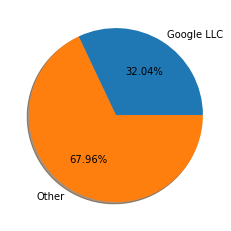

In [6]:
# Grafico cuantas Google LLC tienes en el mercado de appliciones
one_value_pie_plot("Developer Id", "Google LLC", len(df))

### 2.2 Grafico Bar con Categorías
---

<BarContainer object of 17 artists>

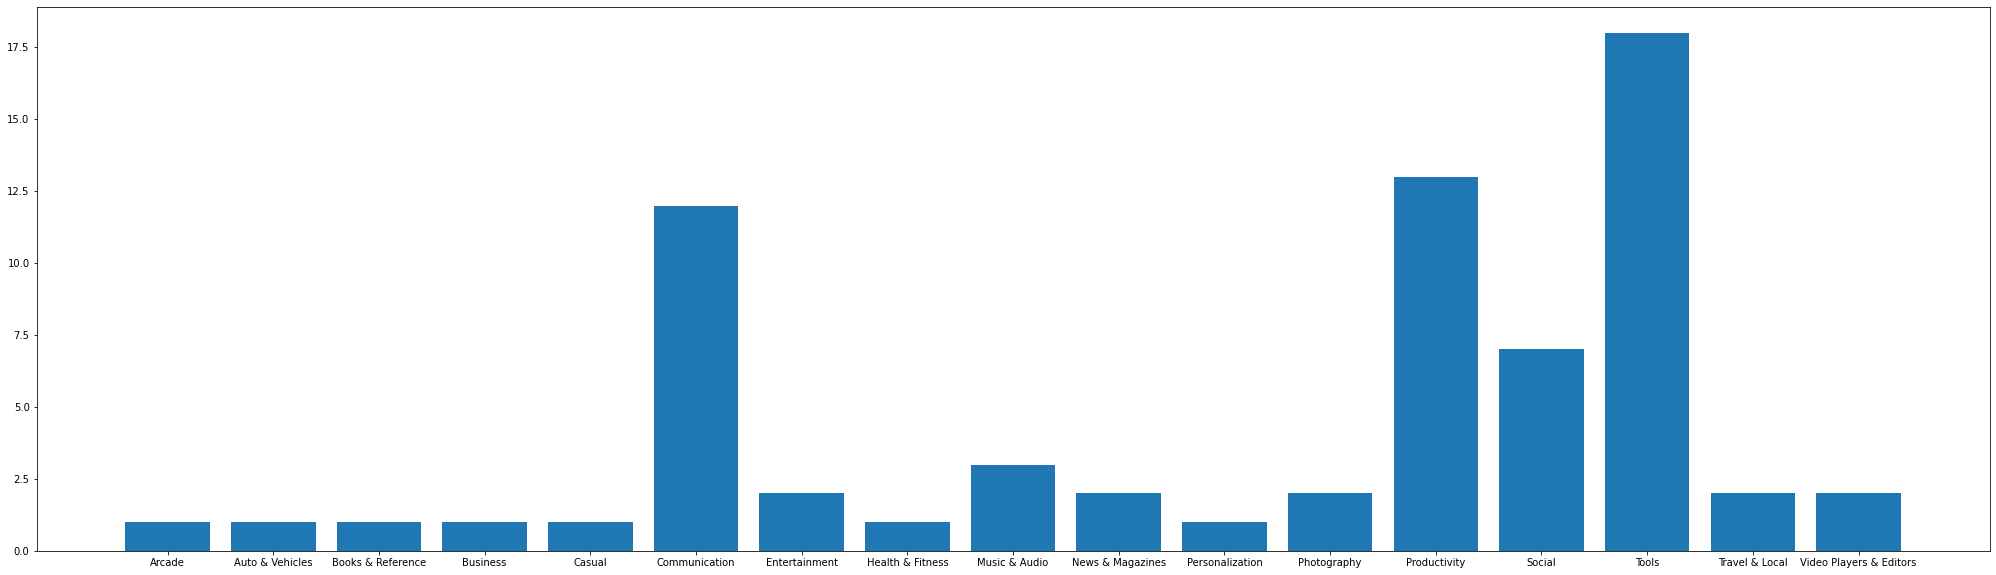

In [7]:
# Hago el funciónes

def no_duplicates_collumn_values(collumn):
    """Returns all values in collumns with no duplicates"""
    return list(set(df.loc[: , collumn]))

def value_counter(collumn):
    """Counts index & values in grouped collumn and returns array containing values and indexes"""
    cat = df.groupby(["Category"]).size()
    return [cat.index.tolist() ,cat.tolist()]



# Grafico de Bar
plt.figure(figsize=(35,10))
plt.bar(value_counter("Category")[0], value_counter("Category")[1])